In [1]:
import itertools
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
import pandas as pd
import numpy as np
import matplotlib.ticker as ticker
from sklearn import preprocessing
import seaborn as sns
%matplotlib inline

In [2]:
pd.set_option('display.max_columns', None)
data = pd.read_csv('data_set.csv')

In [3]:
data.head()

,GEO_LON,GEO_LAT,MONTH,WEEKDAY,TIME,ROAD_CONDITION,LIGHT_CONDITION,HUMAN_FACTOR,TU1_DRIVER_ACTION,ROAD_DESCRIPTION,BICYCLE_IND,PEDESTRIAN_IND,INJURY_YN
0,-105.015348,39.730808,8,5,22,DRY,DARK-LIGHTED,OTHER,CARELESS DRIVING,HIGHWAY INTERCHANGE,0.0,0.0,1
1,-105.031846,39.711128,6,4,22,WET,DARK-LIGHTED,DUI/DWAI/DUID,UNKOWN_DRIVER_ACTION,NON INTERSECTION,0.0,1.0,1
2,-104.998843,39.741401,5,2,14,DRY,DAY LIGHT,OTHER,OTHER,NON INTERSECTION,0.0,0.0,1
3,-104.882975,39.777138,11,2,13,DRY,DAY LIGHT,OTHER,LANE VIOLATION,HIGHWAY INTERCHANGE,0.0,0.0,1
4,-104.865889,39.775633,3,1,19,DRY,DARK-LIGHTED,AGGRESSIVE DRIVING,CARELESS DRIVING,HIGHWAY INTERCHANGE,0.0,0.0,1


In [4]:
data.shape

(8000, 13)

In [436]:
#ADD TARGET VARIABLE AS A STRING
#data['Y_N'] = data['INJURY_YN'].apply(lambda x: 'Y' if x == 1 else 'N')

In [7]:
data['ROAD_CONDITION'].unique()

array(['DRY', 'WET', 'SLUSHY WITH VISIBLE ICY ROAD TREATMENT',
       'SNOWY WITH VISIBLE ICY ROAD TREATMENT', 'ICY', 'MUDDY', 'SLUSHY',
       'SNOWY', 'UNKOWN_ROAD', 'WET WITH VISIBLE ICY ROAD TREATMENT',
       'DRY WITH VISIBLE ICY ROAD TREATMENT', 'FOREIGN MATERIAL',
       'UNDER_INVESTIGATION_ROAD', 'ICY WITH VISIBLE ICY ROAD TREATMENT'],
      dtype=object)

In [377]:
data['LIGHT_CONDITION'].unique()

array(['DARK-LIGHTED', 'DAY LIGHT', 'DAWN OR DUSK', 'DARK-UNLIGHTED',
       'UNKOWN_LIGHT', 'UNDER_INVESTIGATION_LIGHT'], dtype=object)

In [300]:
data['HUMAN_FACTOR'].nunique()

13

In [5]:
df = data

In [6]:
df = pd.concat([df,pd.get_dummies(df['HUMAN_FACTOR'])], axis=1)
df

,GEO_LON,GEO_LAT,MONTH,WEEKDAY,TIME,ROAD_CONDITION,LIGHT_CONDITION,HUMAN_FACTOR,TU1_DRIVER_ACTION,ROAD_DESCRIPTION,BICYCLE_IND,PEDESTRIAN_IND,INJURY_YN,AGGRESSIVE DRIVING,ASLEEP AT THE WHEEL,DISTRACTED,DRIVER EMOTIONALLY UPSET,DRIVER FATIGUE,DRIVER INEXPERIENCE,DRIVER UNFAMILIAR WITH AREA,DUI/DWAI/DUID,EVADING LAW ENFORCEMENT OFFICER,ILLNESS/MEDICAL,OTHER,PHYSICAL DISABILITY,UNDER INVESTIGATION
0,-105.015348,39.730808,8,5,22,DRY,DARK-LIGHTED,OTHER,CARELESS DRIVING,HIGHWAY INTERCHANGE,0.0,0.0,1,0,0,0,0,0,0,0,0,0,0,1,0,0
1,-105.031846,39.711128,6,4,22,WET,DARK-LIGHTED,DUI/DWAI/DUID,UNKOWN_DRIVER_ACTION,NON INTERSECTION,0.0,1.0,1,0,0,0,0,0,0,0,1,0,0,0,0,0
2,-104.998843,39.741401,5,2,14,DRY,DAY LIGHT,OTHER,OTHER,NON INTERSECTION,0.0,0.0,1,0,0,0,0,0,0,0,0,0,0,1,0,0
3,-104.882975,39.777138,11,2,13,DRY,DAY LIGHT,OTHER,LANE VIOLATION,HIGHWAY INTERCHANGE,0.0,0.0,1,0,0,0,0,0,0,0,0,0,0,1,0,0
4,-104.865889,39.775633,3,1,19,DRY,DARK-LIGHTED,AGGRESSIVE DRIVING,CARELESS DRIVING,HIGHWAY INTERCHANGE,0.0,0.0,1,1,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7995,-105.025230,39.751207,6,6,16,DRY,DAY LIGHT,OTHER,FOLLOWED TOO CLOSELY,NON INTERSECTION,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
7996,-105.034610,39.762138,6,1,18,DRY,DAWN OR DUSK,OTHER,CARELESS DRIVING,NON INTERSECTION,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
7997,-104.814705,39.794379,3,5,12,DRY,DAY LIGHT,DRIVER INEXPERIENCE,FAILED TO YIELD ROW,AT INTERSECTION,0.0,0.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
7998,-104.903571,39.778422,12,5,17,DRY,DARK-LIGHTED,DRIVER UNFAMILIAR WITH AREA,DISREGARDED OTHER DEVICE,HIGHWAY INTERCHANGE,0.0,0.0,0,0,0,0,0,0,0,1,0,0,0,0,0,0


In [10]:
df = pd.concat([df,pd.get_dummies(df['ROAD_CONDITION'])], axis=1)
df

,GEO_LON,GEO_LAT,MONTH,WEEKDAY,TIME,ROAD_CONDITION,LIGHT_CONDITION,HUMAN_FACTOR,TU1_DRIVER_ACTION,ROAD_DESCRIPTION,BICYCLE_IND,PEDESTRIAN_IND,INJURY_YN,AGGRESSIVE DRIVING,ASLEEP AT THE WHEEL,DISTRACTED,DRIVER EMOTIONALLY UPSET,DRIVER FATIGUE,DRIVER INEXPERIENCE,DRIVER UNFAMILIAR WITH AREA,DUI/DWAI/DUID,EVADING LAW ENFORCEMENT OFFICER,ILLNESS/MEDICAL,OTHER,PHYSICAL DISABILITY,UNDER INVESTIGATION,DRY,DRY WITH VISIBLE ICY ROAD TREATMENT,FOREIGN MATERIAL,ICY,ICY WITH VISIBLE ICY ROAD TREATMENT,MUDDY,SLUSHY,SLUSHY WITH VISIBLE ICY ROAD TREATMENT,SNOWY,SNOWY WITH VISIBLE ICY ROAD TREATMENT,UNDER_INVESTIGATION_ROAD,UNKOWN_ROAD,WET,WET WITH VISIBLE ICY ROAD TREATMENT
0,-105.015348,39.730808,8,5,22,DRY,DARK-LIGHTED,OTHER,CARELESS DRIVING,HIGHWAY INTERCHANGE,0.0,0.0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
1,-105.031846,39.711128,6,4,22,WET,DARK-LIGHTED,DUI/DWAI/DUID,UNKOWN_DRIVER_ACTION,NON INTERSECTION,0.0,1.0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
2,-104.998843,39.741401,5,2,14,DRY,DAY LIGHT,OTHER,OTHER,NON INTERSECTION,0.0,0.0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
3,-104.882975,39.777138,11,2,13,DRY,DAY LIGHT,OTHER,LANE VIOLATION,HIGHWAY INTERCHANGE,0.0,0.0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
4,-104.865889,39.775633,3,1,19,DRY,DARK-LIGHTED,AGGRESSIVE DRIVING,CARELESS DRIVING,HIGHWAY INTERCHANGE,0.0,0.0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7995,-105.025230,39.751207,6,6,16,DRY,DAY LIGHT,OTHER,FOLLOWED TOO CLOSELY,NON INTERSECTION,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
7996,-105.034610,39.762138,6,1,18,DRY,DAWN OR DUSK,OTHER,CARELESS DRIVING,NON INTERSECTION,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
7997,-104.814705,39.794379,3,5,12,DRY,DAY LIGHT,DRIVER INEXPERIENCE,FAILED TO YIELD ROW,AT INTERSECTION,0.0,0.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
7998,-104.903571,39.778422,12,5,17,DRY,DARK-LIGHTED,DRIVER UNFAMILIAR WITH AREA,DISREGARDED OTHER DEVICE,HIGHWAY INTERCHANGE,0.0,0.0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0


In [7]:
df = pd.concat([df,pd.get_dummies(df['LIGHT_CONDITION'])], axis=1)
df

,GEO_LON,GEO_LAT,MONTH,WEEKDAY,TIME,ROAD_CONDITION,LIGHT_CONDITION,HUMAN_FACTOR,TU1_DRIVER_ACTION,ROAD_DESCRIPTION,BICYCLE_IND,PEDESTRIAN_IND,INJURY_YN,AGGRESSIVE DRIVING,ASLEEP AT THE WHEEL,DISTRACTED,DRIVER EMOTIONALLY UPSET,DRIVER FATIGUE,DRIVER INEXPERIENCE,DRIVER UNFAMILIAR WITH AREA,DUI/DWAI/DUID,EVADING LAW ENFORCEMENT OFFICER,ILLNESS/MEDICAL,OTHER,PHYSICAL DISABILITY,UNDER INVESTIGATION,DARK-LIGHTED,DARK-UNLIGHTED,DAWN OR DUSK,DAY LIGHT,UNDER_INVESTIGATION_LIGHT,UNKOWN_LIGHT
0,-105.015348,39.730808,8,5,22,DRY,DARK-LIGHTED,OTHER,CARELESS DRIVING,HIGHWAY INTERCHANGE,0.0,0.0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0
1,-105.031846,39.711128,6,4,22,WET,DARK-LIGHTED,DUI/DWAI/DUID,UNKOWN_DRIVER_ACTION,NON INTERSECTION,0.0,1.0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0
2,-104.998843,39.741401,5,2,14,DRY,DAY LIGHT,OTHER,OTHER,NON INTERSECTION,0.0,0.0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0
3,-104.882975,39.777138,11,2,13,DRY,DAY LIGHT,OTHER,LANE VIOLATION,HIGHWAY INTERCHANGE,0.0,0.0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0
4,-104.865889,39.775633,3,1,19,DRY,DARK-LIGHTED,AGGRESSIVE DRIVING,CARELESS DRIVING,HIGHWAY INTERCHANGE,0.0,0.0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7995,-105.025230,39.751207,6,6,16,DRY,DAY LIGHT,OTHER,FOLLOWED TOO CLOSELY,NON INTERSECTION,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0
7996,-105.034610,39.762138,6,1,18,DRY,DAWN OR DUSK,OTHER,CARELESS DRIVING,NON INTERSECTION,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0
7997,-104.814705,39.794379,3,5,12,DRY,DAY LIGHT,DRIVER INEXPERIENCE,FAILED TO YIELD ROW,AT INTERSECTION,0.0,0.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0
7998,-104.903571,39.778422,12,5,17,DRY,DARK-LIGHTED,DRIVER UNFAMILIAR WITH AREA,DISREGARDED OTHER DEVICE,HIGHWAY INTERCHANGE,0.0,0.0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0


In [8]:
df = pd.concat([df,pd.get_dummies(df['TU1_DRIVER_ACTION'])], axis=1)
df 

,GEO_LON,GEO_LAT,MONTH,WEEKDAY,TIME,ROAD_CONDITION,LIGHT_CONDITION,HUMAN_FACTOR,TU1_DRIVER_ACTION,ROAD_DESCRIPTION,BICYCLE_IND,PEDESTRIAN_IND,INJURY_YN,AGGRESSIVE DRIVING,ASLEEP AT THE WHEEL,DISTRACTED,DRIVER EMOTIONALLY UPSET,DRIVER FATIGUE,DRIVER INEXPERIENCE,DRIVER UNFAMILIAR WITH AREA,DUI/DWAI/DUID,EVADING LAW ENFORCEMENT OFFICER,ILLNESS/MEDICAL,OTHER,PHYSICAL DISABILITY,UNDER INVESTIGATION,DARK-LIGHTED,DARK-UNLIGHTED,DAWN OR DUSK,DAY LIGHT,UNDER_INVESTIGATION_LIGHT,UNKOWN_LIGHT,CARELESS DRIVING,DISREGARD STOP SIGN,DISREGARDED OTHER DEVICE,EXCEED SAFE/POSTED SPEED,FAILED TO STOP AT SIGNAL,FAILED TO YIELD ROW,FOLLOWED TOO CLOSELY,IMPEDED TRAFFIC,IMPROPER BACKING,IMPROPER PASSING ON LEFT,IMPROPER PASSING ON RIGHT,IMPROPER TURN,LANE VIOLATION,OTHER,OTHER IMPROPER TURNS,RECKLESS DRIVING,SIGNALING VIOLATION,TURNED FROM WRONG LANE OR POSITION,UNDER INVESTIGATION,UNKOWN_DRIVER_ACTION
0,-105.015348,39.730808,8,5,22,DRY,DARK-LIGHTED,OTHER,CARELESS DRIVING,HIGHWAY INTERCHANGE,0.0,0.0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,-105.031846,39.711128,6,4,22,WET,DARK-LIGHTED,DUI/DWAI/DUID,UNKOWN_DRIVER_ACTION,NON INTERSECTION,0.0,1.0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2,-104.998843,39.741401,5,2,14,DRY,DAY LIGHT,OTHER,OTHER,NON INTERSECTION,0.0,0.0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
3,-104.882975,39.777138,11,2,13,DRY,DAY LIGHT,OTHER,LANE VIOLATION,HIGHWAY INTERCHANGE,0.0,0.0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4,-104.865889,39.775633,3,1,19,DRY,DARK-LIGHTED,AGGRESSIVE DRIVING,CARELESS DRIVING,HIGHWAY INTERCHANGE,0.0,0.0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7995,-105.025230,39.751207,6,6,16,DRY,DAY LIGHT,OTHER,FOLLOWED TOO CLOSELY,NON INTERSECTION,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
7996,-105.034610,39.762138,6,1,18,DRY,DAWN OR DUSK,OTHER,CARELESS DRIVING,NON INTERSECTION,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
7997,-104.814705,39.794379,3,5,12,DRY,DAY LIGHT,DRIVER INEXPERIENCE,FAILED TO YIELD ROW,AT INTERSECTION,0.0,0.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
7998,-104.903571,39.778422,12,5,17,DRY,DARK-LIGHTED,DRIVER UNFAMILIAR WITH AREA,DISREGARDED OTHER DEVICE,HIGHWAY INTERCHANGE,0.0,0.0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [9]:
df = pd.concat([df,pd.get_dummies(df['ROAD_DESCRIPTION'])], axis=1)
df

,GEO_LON,GEO_LAT,MONTH,WEEKDAY,TIME,ROAD_CONDITION,LIGHT_CONDITION,HUMAN_FACTOR,TU1_DRIVER_ACTION,ROAD_DESCRIPTION,BICYCLE_IND,PEDESTRIAN_IND,INJURY_YN,AGGRESSIVE DRIVING,ASLEEP AT THE WHEEL,DISTRACTED,DRIVER EMOTIONALLY UPSET,DRIVER FATIGUE,DRIVER INEXPERIENCE,DRIVER UNFAMILIAR WITH AREA,DUI/DWAI/DUID,EVADING LAW ENFORCEMENT OFFICER,ILLNESS/MEDICAL,OTHER,PHYSICAL DISABILITY,UNDER INVESTIGATION,DARK-LIGHTED,DARK-UNLIGHTED,DAWN OR DUSK,DAY LIGHT,UNDER_INVESTIGATION_LIGHT,UNKOWN_LIGHT,CARELESS DRIVING,DISREGARD STOP SIGN,DISREGARDED OTHER DEVICE,EXCEED SAFE/POSTED SPEED,FAILED TO STOP AT SIGNAL,FAILED TO YIELD ROW,FOLLOWED TOO CLOSELY,IMPEDED TRAFFIC,IMPROPER BACKING,IMPROPER PASSING ON LEFT,IMPROPER PASSING ON RIGHT,IMPROPER TURN,LANE VIOLATION,OTHER,OTHER IMPROPER TURNS,RECKLESS DRIVING,SIGNALING VIOLATION,TURNED FROM WRONG LANE OR POSITION,UNDER INVESTIGATION,UNKOWN_DRIVER_ACTION,ALLEY RELATED,AT INTERSECTION,DRIVEWAY ACCESS RELATED,HIGHWAY INTERCHANGE,INTERSECTION RELATED,NON INTERSECTION,PARKING LOT,ROUNDABOUT,UNDER INVESTIGATION,UNKOWN_ROAD_DESCR
0,-105.015348,39.730808,8,5,22,DRY,DARK-LIGHTED,OTHER,CARELESS DRIVING,HIGHWAY INTERCHANGE,0.0,0.0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
1,-105.031846,39.711128,6,4,22,WET,DARK-LIGHTED,DUI/DWAI/DUID,UNKOWN_DRIVER_ACTION,NON INTERSECTION,0.0,1.0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0
2,-104.998843,39.741401,5,2,14,DRY,DAY LIGHT,OTHER,OTHER,NON INTERSECTION,0.0,0.0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
3,-104.882975,39.777138,11,2,13,DRY,DAY LIGHT,OTHER,LANE VIOLATION,HIGHWAY INTERCHANGE,0.0,0.0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,-104.865889,39.775633,3,1,19,DRY,DARK-LIGHTED,AGGRESSIVE DRIVING,CARELESS DRIVING,HIGHWAY INTERCHANGE,0.0,0.0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7995,-105.025230,39.751207,6,6,16,DRY,DAY LIGHT,OTHER,FOLLOWED TOO CLOSELY,NON INTERSECTION,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
7996,-105.034610,39.762138,6,1,18,DRY,DAWN OR DUSK,OTHER,CARELESS DRIVING,NON INTERSECTION,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
7997,-104.814705,39.794379,3,5,12,DRY,DAY LIGHT,DRIVER INEXPERIENCE,FAILED TO YIELD ROW,AT INTERSECTION,0.0,0.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
7998,-104.903571,39.778422,12,5,17,DRY,DARK-LIGHTED,DRIVER UNFAMILIAR WITH AREA,DISREGARDED OTHER DEVICE,HIGHWAY INTERCHANGE,0.0,0.0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0


In [10]:
df.drop(columns=[
    'ROAD_CONDITION', 'LIGHT_CONDITION','HUMAN_FACTOR', 
    'TU1_DRIVER_ACTION','ROAD_DESCRIPTION', 
    #'GEO_LON', 'GEO_LAT'
    ], inplace=True)
df

,GEO_LON,GEO_LAT,MONTH,WEEKDAY,TIME,BICYCLE_IND,PEDESTRIAN_IND,INJURY_YN,AGGRESSIVE DRIVING,ASLEEP AT THE WHEEL,DISTRACTED,DRIVER EMOTIONALLY UPSET,DRIVER FATIGUE,DRIVER INEXPERIENCE,DRIVER UNFAMILIAR WITH AREA,DUI/DWAI/DUID,EVADING LAW ENFORCEMENT OFFICER,ILLNESS/MEDICAL,OTHER,PHYSICAL DISABILITY,UNDER INVESTIGATION,DARK-LIGHTED,DARK-UNLIGHTED,DAWN OR DUSK,DAY LIGHT,UNDER_INVESTIGATION_LIGHT,UNKOWN_LIGHT,CARELESS DRIVING,DISREGARD STOP SIGN,DISREGARDED OTHER DEVICE,EXCEED SAFE/POSTED SPEED,FAILED TO STOP AT SIGNAL,FAILED TO YIELD ROW,FOLLOWED TOO CLOSELY,IMPEDED TRAFFIC,IMPROPER BACKING,IMPROPER PASSING ON LEFT,IMPROPER PASSING ON RIGHT,IMPROPER TURN,LANE VIOLATION,OTHER,OTHER IMPROPER TURNS,RECKLESS DRIVING,SIGNALING VIOLATION,TURNED FROM WRONG LANE OR POSITION,UNDER INVESTIGATION,UNKOWN_DRIVER_ACTION,ALLEY RELATED,AT INTERSECTION,DRIVEWAY ACCESS RELATED,HIGHWAY INTERCHANGE,INTERSECTION RELATED,NON INTERSECTION,PARKING LOT,ROUNDABOUT,UNDER INVESTIGATION,UNKOWN_ROAD_DESCR
0,-105.015348,39.730808,8,5,22,0.0,0.0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
1,-105.031846,39.711128,6,4,22,0.0,1.0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0
2,-104.998843,39.741401,5,2,14,0.0,0.0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
3,-104.882975,39.777138,11,2,13,0.0,0.0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,-104.865889,39.775633,3,1,19,0.0,0.0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7995,-105.025230,39.751207,6,6,16,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
7996,-105.034610,39.762138,6,1,18,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
7997,-104.814705,39.794379,3,5,12,0.0,0.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
7998,-104.903571,39.778422,12,5,17,0.0,0.0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0


In [11]:
Feature = df

In [12]:
Feature.drop(columns=['INJURY_YN',\
                      #'Y_N'
                      #'BICYCLE_IND','PEDESTRIAN_IND' #if keep better for decision tree, KNN, and SVM; but not for logistic regression
                     ], inplace=True)
#Feature.reset_index(inplace=True)
#'INJURY_YN','GEO_LAT','GEO_LON',

In [13]:
Feature.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8000 entries, 0 to 7999
Data columns (total 56 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   GEO_LON                             8000 non-null   float64
 1   GEO_LAT                             8000 non-null   float64
 2   MONTH                               8000 non-null   int64  
 3   WEEKDAY                             8000 non-null   int64  
 4   TIME                                8000 non-null   int64  
 5   BICYCLE_IND                         8000 non-null   float64
 6   PEDESTRIAN_IND                      8000 non-null   float64
 7   AGGRESSIVE DRIVING                  8000 non-null   uint8  
 8   ASLEEP AT THE WHEEL                 8000 non-null   uint8  
 9   DISTRACTED                          8000 non-null   uint8  
 10  DRIVER EMOTIONALLY UPSET            8000 non-null   uint8  
 11  DRIVER FATIGUE                      8000 no

df1 = pd.DataFrame(
            [np.ones(14)*0], 
            index=df.index, 
            columns=[
                'DRY', 'WET', 'SLUSHY WITH VISIBLE ICY ROAD TREATMENT',
                'SNOWY WITH VISIBLE ICY ROAD TREATMENT', 'ICY', 'MUDDY', 'SLUSHY',
                'SNOWY', 'UNKOWN_ROAD', 'WET WITH VISIBLE ICY ROAD TREATMENT',
                'DRY WITH VISIBLE ICY ROAD TREATMENT', 'FOREIGN MATERIAL',
                'ICY WITH VISIBLE ICY ROAD TREATMENT', 'UNDER INVESTIGATION_ROAD'
            ]
        )
df1

np.ones(14)*0

dfcomb = pd.concat(
    [df1, df2, df3
    ], axis=1
)
dfcomb

In [14]:
y = data['INJURY_YN'].values
#y = data['Y_N'].values
y

array([1, 1, 1, ..., 0, 0, 0], dtype=int64)

In [15]:
X= preprocessing.StandardScaler().fit(Feature).transform(Feature)
X[0:5]

array([[-0.79506867, -0.03421242,  0.42109679,  1.02756851,  1.51802842,
        -0.20607567, -0.3483033 , -0.35111249, -0.0776931 , -0.33702484,
        -0.04748762, -0.07930516, -0.26474697, -0.18364446, -0.31352454,
        -0.07604771, -0.11915865,  0.880574  , -0.05006262, -0.02500782,
         1.5594882 , -0.1521471 , -0.20775172, -1.29099445, -0.02500782,
        -0.13916893,  1.55760207, -0.13297454, -0.05598925, -0.15723042,
        -0.24384898, -0.41430202, -0.35959071, -0.04614678, -0.14056247,
        -0.04879195, -0.04034408, -0.12076694, -0.25626556, -0.30820516,
        -0.0603174 , -0.21325643, -0.02959335, -0.09395338, -0.02500782,
        -0.33472049, -0.10903992, -0.78495963, -0.17166402,  3.90220201,
        -0.2916162 , -0.7675894 , -0.22331316, -0.0548546 , -0.02500782,
        -0.12952535],
       [-1.02935473, -0.50362788, -0.16800426,  0.51152657,  1.51802842,
        -0.20607567,  2.43256135, -0.35111249, -0.0776931 , -0.33702484,
        -0.04748762, -0.07930

In [16]:
from sklearn.model_selection import train_test_split

In [17]:
from sklearn.metrics import f1_score

In [18]:
from sklearn.metrics import jaccard_score

In [19]:
from sklearn import metrics

In [20]:
from sklearn.metrics import confusion_matrix

In [21]:
from sklearn.tree import DecisionTreeClassifier

In [22]:
dtX_trainset, dtX_testset, dty_trainset, dty_testset = train_test_split(X, y, test_size=0.2, random_state=3)

In [23]:
print(dtX_trainset.shape, dtX_testset.shape , dty_trainset.shape, dty_testset.shape)

(6400, 56) (1600, 56) (6400,) (1600,)


In [24]:
Tree = DecisionTreeClassifier(criterion="entropy")
Tree # it shows the default parameters

DecisionTreeClassifier(criterion='entropy')

In [25]:
Tree.fit(dtX_trainset,dty_trainset)

DecisionTreeClassifier(criterion='entropy')

In [26]:
predTree = Tree.predict(dtX_testset)
print (predTree [0:10])
print (dty_testset [0:10])

[1 0 1 0 0 1 1 0 1 0]
[0 0 1 1 1 1 1 0 1 0]


In [27]:
print("DecisionTrees's Accuracy: ", metrics.accuracy_score(dty_testset, predTree))

DecisionTrees's Accuracy:  0.6425


In [28]:
jaccard_score(dty_testset, predTree)

0.47183748845798706

In [29]:
f1_score(dty_testset, predTree, average='weighted')

0.6425217854626081

In [30]:
tn, fp, fn, tp = confusion_matrix(dty_testset, predTree).ravel()
(tn, fp, fn, tp)

(517, 299, 273, 511)

In [31]:
lgX_train, lgX_test, lgy_train, lgy_test = train_test_split( X, y, test_size=0.2, random_state=4)

In [32]:
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression(C=0.01, solver='liblinear').fit(lgX_train,lgy_train)
LR

LogisticRegression(C=0.01, solver='liblinear')

In [33]:
lgyhat = LR.predict(lgX_test)
lgyhat

array([0, 0, 0, ..., 1, 0, 1], dtype=int64)

In [34]:
yhat_prob = LR.predict_proba(lgX_test)
yhat_prob[:5]

array([[0.54956535, 0.45043465],
       [0.94798772, 0.05201228],
       [0.71860653, 0.28139347],
       [0.96926726, 0.03073274],
       [0.54082825, 0.45917175]])

In [35]:
from sklearn.metrics import log_loss
log_loss(lgy_test, yhat_prob)

0.5232009906932328

In [57]:
print("Logistiv Regression Accuracy: ", metrics.accuracy_score(lgy_test, lgyhat))

Logistiv Regression Accuracy:  0.741875


In [36]:
f1_score(lgy_test, lgyhat, average='weighted')

0.7412677052170641

In [37]:
jaccard_score(lgy_test, lgyhat)

0.5661764705882353

In [59]:
tn_r, fp_r, fn_r, tp_r = confusion_matrix(lgy_test,  lgyhat).ravel()
(tn_r, fp_r, fn_r, tp_r)

(648, 179, 234, 539)

In [39]:
from sklearn.model_selection import train_test_split
knnX_train, knnX_test, knny_train, knny_test = train_test_split( X, y, test_size=0.2, random_state=4)
print ('Train set:', knnX_train.shape,  knny_train.shape)
print ('Test set:', knnX_test.shape,  knny_test.shape)

Train set: (6400, 56) (6400,)
Test set: (1600, 56) (1600,)


In [40]:
from sklearn.neighbors import KNeighborsClassifier

In [41]:
#create graph to determine best k value
from sklearn import metrics
Ks = 20
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))
ConfustionMx = [];
for n in range(1,Ks):
    
    #Train Model and Predict  
    neigh = KNeighborsClassifier(n_neighbors = n).fit(knnX_train,knny_train)
    knnyhat=neigh.predict(knnX_test)
    mean_acc[n-1] = metrics.accuracy_score(knny_test, knnyhat)

    
    std_acc[n-1]=np.std(knnyhat==knny_test)/np.sqrt(knnyhat.shape[0])

mean_acc

array([0.639375, 0.660625, 0.691875, 0.67625 , 0.700625, 0.6975  ,
       0.706875, 0.698125, 0.701875, 0.705625, 0.698125, 0.6975  ,
       0.706875, 0.70375 , 0.7075  , 0.714375, 0.721875, 0.715   ,
       0.71875 ])

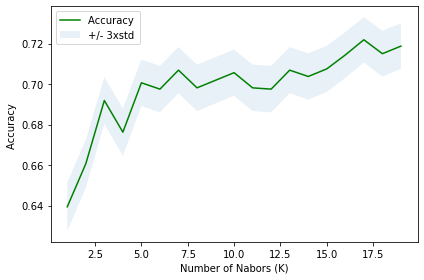

In [42]:
plt.plot(range(1,Ks),mean_acc,'g')
plt.fill_between(range(1,Ks),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.legend(('Accuracy ', '+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Nabors (K)')
plt.tight_layout()
plt.show()

In [43]:
k = 17
neigh7 = KNeighborsClassifier(n_neighbors = k).fit(knnX_train,knny_train)
yhat7 = neigh7.predict(knnX_test)
print("Train set Accuracy: ", metrics.accuracy_score(knny_train, neigh7.predict(knnX_train)))
print("Test set Accuracy: ", metrics.accuracy_score(knny_test, yhat7))

Train set Accuracy:  0.73546875
Test set Accuracy:  0.721875


In [44]:
f1_score(knny_test, yhat7, average='weighted')

0.7205318505747172

In [45]:
jaccard_score(knny_test, yhat7)

0.532563025210084

In [46]:
tn, fp, fn, tp = confusion_matrix(knny_test, yhat7).ravel()
(tn, fp, fn, tp)

(648, 179, 266, 507)

In [47]:
svmX_train, svmX_test, svmy_train, svmy_test = train_test_split( X, y, test_size=0.2, random_state=4)
print ('Train set:', svmX_train.shape,  svmy_train.shape)
print ('Test set:', svmX_test.shape,  svmy_test.shape)

Train set: (6400, 56) (6400,)
Test set: (1600, 56) (1600,)


In [48]:
from sklearn import svm
clf = svm.SVC(kernel='rbf')
clf.fit(svmX_train, svmy_train) 

SVC()

In [49]:
svmyhat = clf.predict(svmX_test)
svmyhat [0:5]

array([0, 0, 0, 0, 0], dtype=int64)

In [50]:
jaccard_score(svmy_test, svmyhat)

0.5731958762886598

In [51]:
f1_score(svmy_test, svmyhat, average='weighted')

0.741100089488296

In [52]:
tn, fp, fn, tp = confusion_matrix(svmy_test, svmyhat).ravel()
(tn, fp, fn, tp)

(630, 197, 217, 556)

In [53]:
clf2 = svm.SVC(kernel='linear')
clf2.fit(svmX_train, svmy_train) 
yhat2 = clf2.predict(svmX_test)
print("Avg F1-score: %.4f" % f1_score(svmy_test, yhat2, average='weighted'))
print("Jaccard score: %.4f" % jaccard_score(svmy_test, yhat2))

Avg F1-score: 0.7143
Jaccard score: 0.5580


In [54]:
print("Train set Accuracy: ", metrics.accuracy_score(svmy_train, clf2.predict(svmX_train)))
print("Test set Accuracy: ", metrics.accuracy_score(svmy_test, yhat2))

Train set Accuracy:  0.70546875
Test set Accuracy:  0.714375


In [55]:
svmy_test

array([1, 0, 0, ..., 1, 0, 1], dtype=int64)

In [56]:
tn2, fp2, fn2, tp2 = confusion_matrix(svmy_test, yhat2).ravel()
(tn2, fp2, fn2, tp2)

(566, 261, 196, 577)

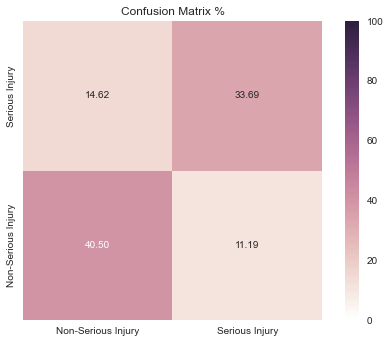

In [60]:
#/usr/bin/env python

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
import pandas as pd

import seaborn as sns
import math

from mpl_toolkits.axes_grid1 import make_axes_locatable

import matplotlib as mpl

mpl.style.use('seaborn')

conf_arr = np.array([[tn_r,fp_r],[fn_r,tp_r]])

sum = conf_arr.sum()

conf_arr = conf_arr * 100.0 / ( 1.0 * sum )

df_cm = pd.DataFrame(conf_arr, 
  index = [ 'Non-Serious Injury', 'Serious Injury'],
  columns = ['Non-Serious Injury', 'Serious Injury'])

fig = plt.figure()

plt.clf()

ax = fig.add_subplot(111)
ax.set_aspect(1)

cmap = sns.cubehelix_palette(light=1, as_cmap=True)

res = sn.heatmap(df_cm, annot=True, vmin=0.0, vmax=100.0, fmt='.2f', cmap=cmap)

res.invert_yaxis()

plt.yticks([0.5,1.5], ['Non-Serious Injury', 'Serious Injury'], va='center')

plt.title('Confusion Matrix %')

plt.savefig('confusion_matrix.png', dpi=100, bbox_inches='tight' )

#plt.close()